# IMPORTING KERAS AND CIFAR-10 DATASET

In [1]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 171s 1us/step


In [2]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


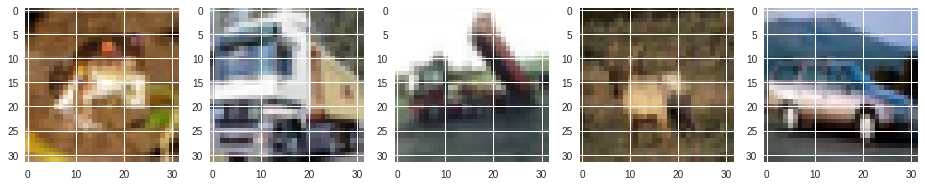

In [3]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [0]:
# A simple CNN Model fr CIFAR-10

In [0]:
import keras 
from keras.models import Sequential
from keras.layers import  Conv2D, MaxPooling2D, Dense, Flatten,Dropout,Activation
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import numpy as np
from keras import regularizers
from keras.datasets import cifar10
from keras.optimizers import SGD 

In [5]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

print('Shape of training dataset :',x_train.shape)
print('Shape of testing dataste :' ,x_test.shape)

#formatting the dataset 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

Shape of training dataset : (50000, 32, 32, 3)
Shape of testing dataste : (10000, 32, 32, 3)


In [6]:
len(x_train)

50000

In [0]:
model = Sequential()

weight_decay  = 0.0003
weight_decay_1= 0.0001  
#layer1
model.add(Conv2D(32,(3,3),input_shape=[32,32,3],kernel_regularizer=regularizers.l2(weight_decay_1),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#layer2
model.add(Conv2D(32,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

#layer 3
model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))


#layer4
model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

#layer5


model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#layer6

model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


In [0]:
model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
__________

In [0]:

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.2,
                              patience=15, min_lr=0.001)


In [0]:
SGD = SGD(lr=0.01, decay=1e-6, momentum=0.9)

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])



In [14]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 64, validation_data = (x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 35s 706us/step - loss: 2.1523 - acc: 0.3548 - val_loss: 2.0206 - val_acc: 0.3225
Epoch 2/50
50000/50000 [==============================] - 28s 567us/step - loss: 1.5310 - acc: 0.4857 - val_loss: 1.5909 - val_acc: 0.4721
Epoch 3/50
50000/50000 [==============================] - 28s 567us/step - loss: 1.3654 - acc: 0.5496 - val_loss: 1.4849 - val_acc: 0.5176
Epoch 4/50
50000/50000 [==============================] - 28s 567us/step - loss: 1.2476 - acc: 0.5937 - val_loss: 1.6916 - val_acc: 0.4483
Epoch 5/50
50000/50000 [==============================] - 28s 567us/step - loss: 1.1584 - acc: 0.6252 - val_loss: 1.4325 - val_acc: 0.5485
Epoch 6/50
50000/50000 [==============================] - 28s 567us/step - loss: 1.0868 - acc: 0.6497 - val_loss: 1.3588 - val_acc: 0.5513
Epoch 7/50
50000/50000 [==============================] - 28s 568us/step - loss: 1.0347 - acc: 0.6709 - val_loss: 1.

In [15]:
model.predict(x_test)

array([[7.3920496e-06, 7.8612501e-08, 7.1591945e-05, ..., 7.4744895e-07,
        6.3572583e-07, 1.8488718e-07],
       [2.8217723e-06, 3.1809435e-05, 1.2742549e-09, ..., 9.6860081e-12,
        9.9996519e-01, 7.0416093e-08],
       [4.9894414e-05, 2.7067173e-02, 1.5385982e-06, ..., 4.9222820e-07,
        9.7272146e-01, 1.1139932e-04],
       ...,
       [2.2268827e-09, 3.8743782e-11, 2.9291501e-04, ..., 1.6761276e-05,
        2.9389304e-09, 7.3249173e-10],
       [1.3440003e-02, 9.0119785e-01, 6.2233483e-04, ..., 3.2268481e-06,
        2.3698715e-06, 4.3425863e-04],
       [7.8430020e-08, 1.9199318e-09, 5.7771169e-05, ..., 9.8566335e-01,
        2.9693581e-09, 2.6552528e-11]], dtype=float32)

In [16]:
scores=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 237us/step


In [17]:
scores

[0.6590898213386536, 0.8222]

## **Accuracy of model without data augmentation**

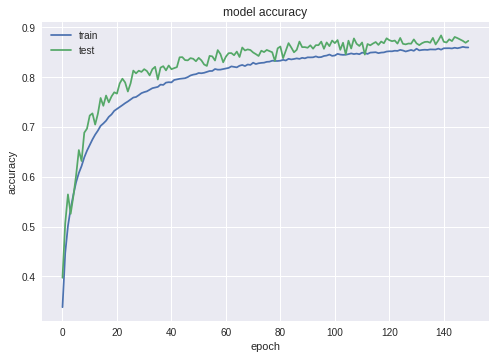

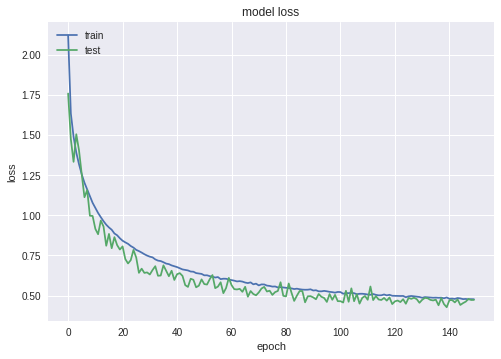

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **EXPERIMENT: 2 -- INCLUDING DATA AUGMENTATION**


In [0]:
def get_model(activation='relu',loss='categorical_crossentropy',optimizer='sgd', epochs = 20):
  model = Sequential()
  
  

  model.add(Conv2D(32,(3,3),input_shape=[32,32,3],padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  #layer2
  model.add(Conv2D(32,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))

  #layer 3
  model.add(Conv2D(64,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.4))


  #layer4
  model.add(Conv2D(64,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))

  #layer5


  model.add(Conv2D(128,(3,3),padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  #layer6

  model.add(Conv2D(128,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))
  
  
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Dropout(0.3))
  model.add(Dense(10,activation='softmax'))
  model.summary()
  
  reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.2,
                              patience=15, min_lr=0.001)
  
  
  
  #SGD = SGD(lr=0.01, decay=1e-6, momentum=0.9)
  
  model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  
  datagen = ImageDataGenerator(
      
      featurewise_center=False,
      featurewise_std_normalization=False,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      vertical_flip = False)
  
  datagen.fit(x_train)
  
  
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) / 32, epochs=50,
                    validation_data = (x_test,y_test),callbacks= [reduce_lr])
  
  
  #history = model.fit_generator(x_train, y_train, epochs = 50, batch_size = 64, validation_data = (x_test,y_test))
  
  
  
  
  return model, history
  
  
  
  
  



In [19]:
model1,history1= get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
__________

In [20]:
scores1=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 208us/step


In [21]:
print("Accuracy with data augmentation",scores1[1])

Accuracy with data augmentation 0.8222


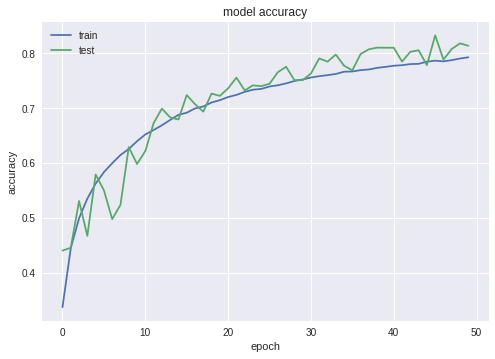

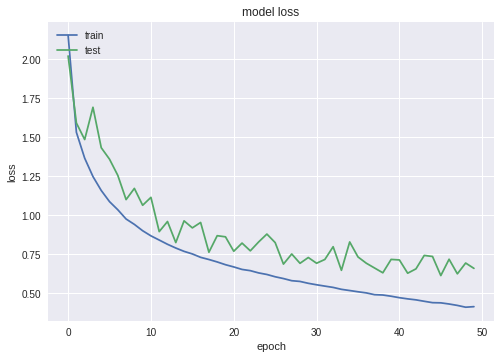

In [22]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **EXPERIMENT 3: KERNEL REGULARIZER- L2**

In [0]:
def get_trained_model(activation='relu',loss='categorical_crossentropy',optimizer='sgd', epochs = 20):
  model = Sequential()
  
  

  weight_decay  = 0.0003
  weight_decay_1= 0.0001  
  #layer1
  model.add(Conv2D(32,(3,3),input_shape=[32,32,3],kernel_regularizer=regularizers.l2(0.0003),padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  #layer2
  model.add(Conv2D(32,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))

  #layer 3
  model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.4))


  #layer4
  model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))

  #layer5


  model.add(Conv2D(128,(3,3),padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  #layer6

  model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))
  
  
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Dropout(0.3))
  model.add(Dense(10,activation='softmax'))
  model.summary()
  
  reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.2,
                              patience=15, min_lr=0.001)
  
  
  
  
  model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  

  
  
  history = model.fit(x_train, y_train, epochs = 50, batch_size = 64, validation_data = (x_test,y_test))
  
  
  
  
  return model, history
  
  
  
  
  



In [24]:
model2, history2 = get_trained_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
__________

In [25]:
scores2=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 262us/step


In [27]:
print("Accuracy with Kernel Regulazier L2",scores2[1])

Accuracy with Kernel Regulazier L2 0.8222


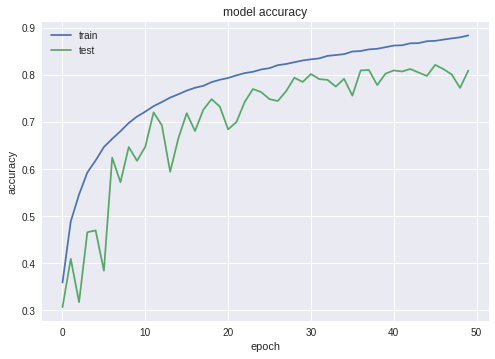

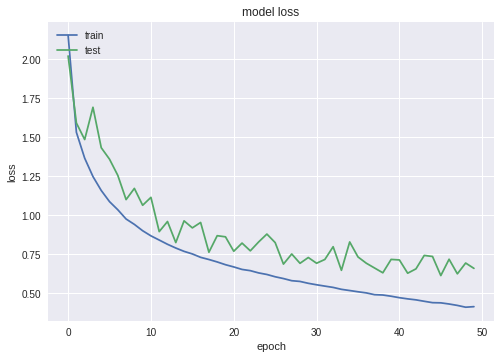

In [28]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

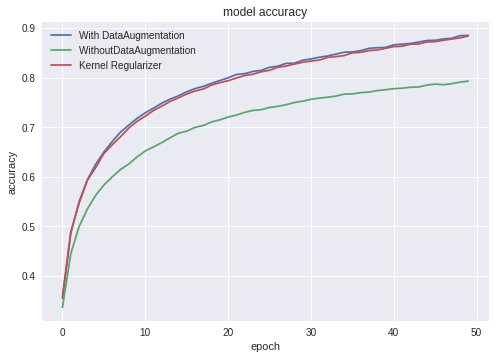

In [30]:
# summarize history for loss
plt.plot(history.history['acc'])
plt.plot(history1.history['acc'])
plt.plot(history2.history['acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['With DataAugmentation', 'WithoutDataAugmentation ', 'Kernel Regularizer'], loc='upper left')
plt.show()



**Copyright <2018> COPYRIGHT Holder< Manasa BS> COPYRIGHT Holder< Abhinav Tiwari> COPYRIGHT Holder < Nilesh Nerkar>**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE